# **Predicting Heart Disease in U.S Adults from key personal indicators using Naive Bayes, Logistic Regression, and Multi-Layer Preceptron algorithms**
---
**Prepared for**: CSI 4106, Introduction to Artificial Intelligence: Project 1, Classification Empirical Study

**Prepared by**: Group 46

1. Feyi Adesanya, 300120992
2. Amit Shanbhoug, 8677407

**Submission Date**: November 1, 2022

**Project Repository**: https://github.com/faith176/Kaggle-Dataset

**Dataset Source**: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# **1. Understanding the classification task for our dataset**

---


Our selected dataset, *Personal Key Indicators of Heart Disease* is from a 2020 annual Center for Disease Control (CDC) survey of 400k adults in the United States (U.S), specifically from the Behavioral Risk Factor Surveillance System. We note that the CDC is a reliable source for health data as well as the recency of the data (2020), which allows us to form relevant conclusions and next steps. Further, we note that the dataset contains a binary variable *HeartDisease* - respondents indicated whether they have heart disease. 

When looking at the dataset, we also note that the classes are not balanced, as there are a significant number of respondents who have indicated the absence of heart disease. To rectify this, the project can do undersampling or oversampling for future iterations, but both have their benefits and downsides.

This dataset contains key personal indicators of heart disease in U.S adults - as an example, indicators include whether an individual chooses to drink  or smoke . Through this project, we conduct a binary classification, checking whether a participant is likely to have Heart Disease in the future. We will apply three supervised machine learning algorithms to test this: Native Bayes, Multilayer Perception, and Logistic Regression.


In tandem with from our goal to better predict risk of Heart Disease in adults, this project will augment our ability to understand and predict behavioral risk factors in the detection of Heart Disease.

# **2. Analsysis of Dataset**

---



General Overview of the Dataset
---


**In the following code cell**, we import all the necessary libraries and packages in order to give a general overview of the data.

**Generating Initial Overview of Data**:

1. A copy of this Jupyter notebook is saved on Github, the Kaggle dataset we use is uploaded to the Github repository as well. We obtain the raw link and use that to read the CSV file. 

2. Next, we convert this CSV file to a Pandas Dataframe and print all 18 columns. The purpose of this is to ensure the CSV file is allowed to process further as 2-D data with the respective labels. From this, we can see the total number of columns in the dataset (18), data type for each column, and how many non-null values are present in each column. However, this does not tell us how many missing/null values are present in the dataset. We will show this in the following code cell/step.

In [ ]:
# All necessary imports will be placed here, we will utilize scikit-learn, matplotlib, and pandas.
import pandas as pandas
import sklearn
import matplotlib.pyplot as plt
import seaborn as seaborn
import numpy as numpy

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#  Read the Data
csv_file = "https://raw.githubusercontent.com/faith176/Kaggle-Dataset-Analysis/master/heart_2020_cleaned.csv?token=GHSAT0AAAAAAB5XYB5RDO6SZ7GVCAQGZ4GGY6RUFGQ"

# Place the dataset into a format we can use: Pandas Dataframe
data_df = pandas.read_csv(csv_file)
print("Dataset Columns: ")
print(list(data_df))

#Show name and data type of each column in the dataset
data_df.info()
data_df.head()

Dataset Columns: 
['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Description of Dataset Attributes**: Information from dataset (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

0.   **HeartDisease**: Variable to indicate either absence or presence of Heart Disease or Myocardian Infarction (Heart Attack)

1.   **BMI**: Body Mass Index which is a measure for body fat based on height, weight, and gender

2. **Smoking**: Has the respondent smoked at least 100 cigarettes in their entire life? Note: 5 packs = 100 cigarettes

3. **AlcoholDrinking**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

4. **Stroke**: Has the respondent experienced a stroke?

5. **PhysicalHealth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

6. **MentalHealth**:

7. **DiffWalking**: Does the respondent have any serious difficilty walking/climbing stairs?

8. **Sex**: Male or Female

9. **AgeCategory**: Fourteen-level age category

10. **Race**: Imputed race/ethnicity value

11. **Diabetic**: (Ever told) (you had) diabetes?

12. **PhysicalActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

13. **GenHealth**: Would you say that in general your health is...very good, good, or other

14. **SleepTime**: On average, how many hours of sleep do you get in a 24-hour period?

15. **Asthma**: Does the respondent have or had asthama?

16. **KidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

17. **SkinCancer**: Does the respondent have skin cancer?


**In the following code cell**, we are displaying the quantity of missing data in our dataset - we have none.

This output is important because it means that there is no bias in our dataset arising from missing values, leading to less accurate & precise results. For instance, while Naive Bayes can support datasets with missing values, many ML models cannot. Further, tackling missing values in our dataset is 

In [ ]:
missing_data = pandas.DataFrame({'total_missing': data_df.isnull().sum(), 'perc_missing': (data_df.isnull().sum()/319795)*100})
missing_data

,total_missing,perc_missing
HeartDisease,0,0.0
BMI,0,0.0
Smoking,0,0.0
AlcoholDrinking,0,0.0
Stroke,0,0.0
PhysicalHealth,0,0.0
MentalHealth,0,0.0
DiffWalking,0,0.0
Sex,0,0.0
AgeCategory,0,0.0


**In the following code cell**, We present the first five values in each column of the dataset 

In [ ]:
print(data_df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

Here is a sample of the dataset: 

Binary Categories - HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWaking, Sex, Diabetic, PhysicalActivity, Asthema, KidneyDisease, and SkinCancer

Non-Binary Categories - BMI, PhysicalHealth, MentalHealth, AgeCategory, Race, GenHealth, SleepTime

*Measures For the Dataset*

In [ ]:
#Rows 
print("The total number of rows are: ",(len(data_df)))
#Columns
print("The total number of columns: ",(len(data_df.columns)))
#Total
print("the total number of data is: ",(data_df.size))
print("-----------------------------------")

print("Numeric and statistic measures for all Continuous Features (Numeric Variables)\n")
print(data_df.describe())


The total number of rows are:  319795
The total number of columns:  18
the total number of data is:  5756310
-----------------------------------
Numeric and statistic measures for all Continuous Features (Numeric Variables)

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


Previous Probabilities and Bias: What Can We Calculate Now 
---


**In the following code cell**,  we calculate the probability of any participant in the study having Heart disease. This is important because we can clearly see a large bias in the data towards particpants not having Heart Disease. However, it is important to take into consideration the type of data we are working with. The data was gather from a random sample of inidviduals meant to mimic the population on a smaller scale.

In [ ]:
for yesOrNo in data_df['HeartDisease'].value_counts().iteritems():
    print("The Prior Probability of", yesOrNo[0], "to a participant having Heart Disease is", round((yesOrNo[1] / data_df['HeartDisease'].shape[0]*100),2),"%")

The Prior Probability of No to a participant having Heart Disease is 91.44 %
The Prior Probability of Yes to a participant having Heart Disease is 8.56 %


# **3. Brainstorm about the attributes (Feature engineering)**
---




**In the following code cell**, 

In [ ]:
print("Dataset Columns: ")
print(list(data_df))

Dataset Columns: 
['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


Convert Binary Columns into A Numerical Format For Graphing
---

**In the following code cell**, We converted all binary type data within the dataset into a numeric coding, with 0 = False and 1 = True. This is to ensure we have continous data for all of our attributes. 

In [ ]:
binary_columns = ['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer' ]
#Convert Binary Columns to 0 or 1
data_df[binary_columns] = data_df[binary_columns].apply(LabelEncoder().fit_transform)

#Binary Columns New Output after conversion
for column in binary_columns:
    print(column,data_df[column].unique())

HeartDisease [0 1]
Smoking [1 0]
AlcoholDrinking [0 1]
Stroke [0 1]
DiffWalking [0 1]
Sex [0 1]
PhysicalActivity [1 0]
Asthma [1 0]
KidneyDisease [0 1]
SkinCancer [1 0]


Correlations
---
**In the following code cell**, using the corr() function from the DataFrame library we can calculate the pairwise correlation matrix of all columns in the dataset. 

**How to Interpret this Chart**: This chart depicts the correlation between all pairs of numerical features in the dataset. With reference to the scale to the right of the chart, the lighter the square color, the higher the correlation, and the darker squares correspond to a lower correlation.

**Initial Thoughts**:

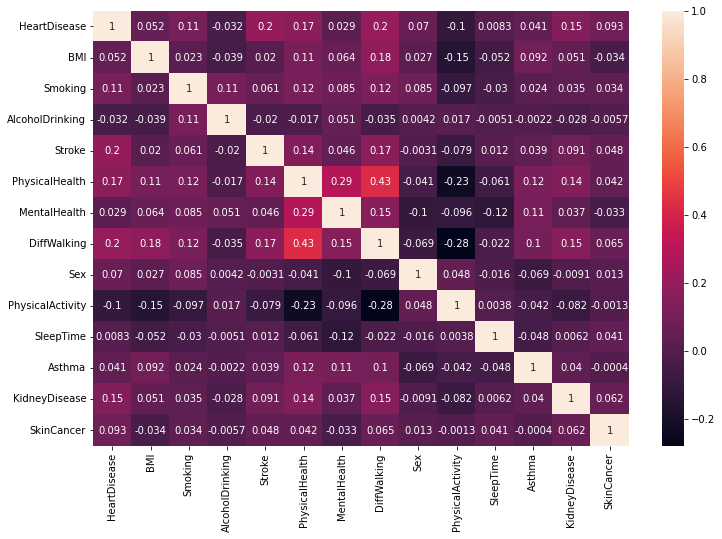

In [ ]:
#Pairwise Correlation of Continuous Features
plt.figure(figsize=(12, 8))
seaborn.heatmap(data_df.corr(), annot=True)

Choosing Our Features
---
**Features Picked**: HeartDisease, Smoking, AlcoholDrinking, BMI, Sex, Kidney Disease, Mental Health, Physical Health, Age Category, Race, and Physical Activity

**Features not Picked**: Stroke, DiffWalking, SleepTime, Asthma, SkinCancer, GenHealth, and Diabetic

We decided to retain certain features based on their relevancy to a participants general health and the affect of certain features directly on heart diease. We feel that each one picked will affect the weights our system in a manner that is relevant to the end result we want. 

Heart Disease is affected by main factors of human health. External factors also influence heart disease, so we kept Alcohol Drinking, Smoking, BMI, and Physical Activity as those can be somewhat controlled by the participant. Previous medical condition were also considered as having KidneyDisease in the past may be an influence along with Mental Health which has a background on causing unforseen issues on the body's physical and emotional state. We also kept features that cannot be controled such as Age and Race, in which certain groups have a higher likelyhood to have the disease. 

We did not select features that were considered to be noisy features and data which were causing the model to overfit the data along with their direct releancy to HeartDisease in a human participant being less than others. By removing this data we are helping to improve the accuracy of our model and maintain only the most relevant weights in our solution. 

**In the following code cell**, We drop the categories not selected to be used as our features from the dataset

In [ ]:
#Drop Unrelated Categories
data_df.pop('Stroke')
data_df.pop('DiffWalking')
data_df.pop('SleepTime')
data_df.pop('Asthma')
data_df.pop('SkinCancer')
data_df.pop('GenHealth')
data_df.pop('Diabetic')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   Sex               319795 non-null  int64  
 7   AgeCategory       319795 non-null  object 
 8   Race              319795 non-null  object 
 9   PhysicalActivity  319795 non-null  int64  
 10  KidneyDisease     319795 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 26.8+ MB


Exploring Our Chosen Features
---

**In the following code cell**, the histogram depicts the distribution of values from each attribute in our dataset. The y axis describes the exact amount of parcipants while the x-axis describes the different values each feature can take

We chose a histogram in order to view the data points seperated in key ranges.

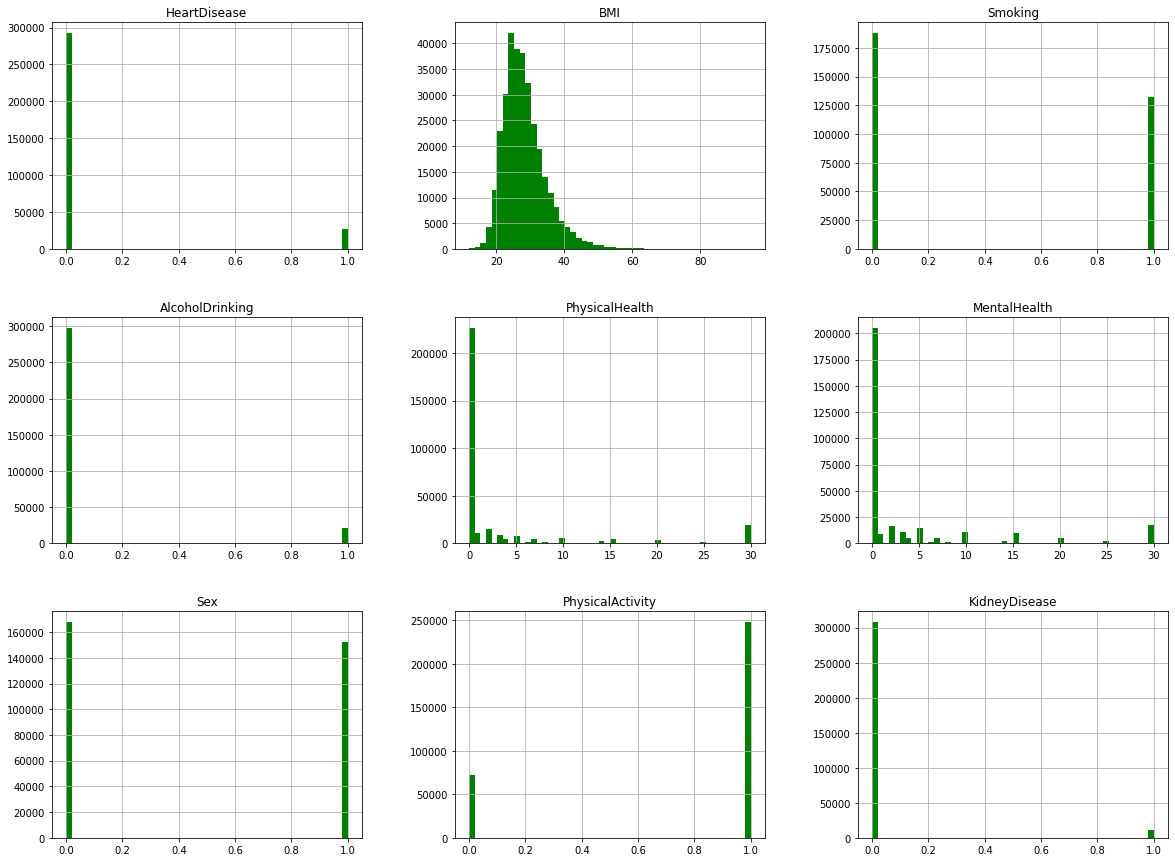

In [ ]:
# Plotting Distributions using Histograms for Numerical Features
data_df.hist(bins=50, figsize=(20,15), color='g')
plt.show()

**In the following code cell**, the horizontal bar graphs describe a similar distribution as above for features/attriutes which have non-numeric values. The y-axis describes the feature value while the x-axis describes the exact amount of participants.

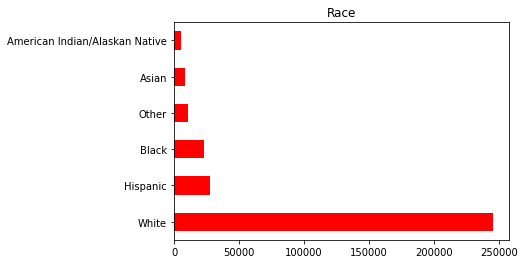

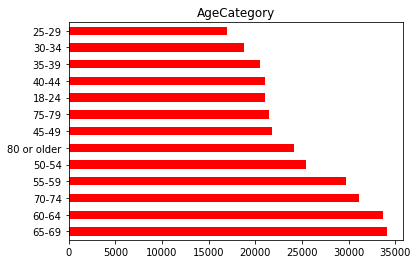

In [ ]:
#@title Default title text
#Plotting the Distribution using a Horizontal Bar Chart for Categorical Features
def create_barh (columnNames):
  for col in columnNames:
    plt.figure()
    data_df[col].value_counts().plot(kind="barh", title=col, color='r')
    plt.show
  
create_barh(['Race', 'AgeCategory'])

# **4. Encode the features**

---



The purpose of encoding (pre-processing data) is to ensure the data is transformed in a manner that will allow for it to be fed into an algorithm, because some algorithms can take specific data types.

**Encoding for Naive Bayes**

The Naive Bayes algorithm only accepts discrete data variables. Our dataset has

**Encoding for Logistic Regression**

The Logistic Regression algorithm accepts both discrete and continuous data variables.

**Encoding for Multi-Layer Perceptron**

The Multi-Layer Perceptron algorithm accepts both discrete and continuous data variables.

## Encoding Columns to Numerical Representations
---
**In the following code cell**, Binary Columns are converted to 0 and 1 using the 

*   Binary Columns are converted in 0 and 1s using the label encoder function (Already Done Earlier)
*   Nominal Columns are converted using One Hot Endoding (split into multiple columns)

In [ ]:
#Convert Heart Disease to True or False
#data_df['HeartDisease'] = data_df['HeartDisease'].map({1: 'TRUE', 0: 'FALSE'})

#Unique Values From Each Column 
columns = data_df.columns
for column in columns:
    print(column,data_df[column].unique())

HeartDisease [0 1]
BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking [1 0]
AlcoholDrinking [0 1]
PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
Sex [0 1]
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
PhysicalActivity [1 0]
KidneyDisease [0 1]


**In the following code cell**, The nominal features chosen from the dataset are converted using one-hot-encoding to create multiple mutually exclusive columns for each value of the feature. 

We have a modified dataset, *new_data_df*, that will be used moving ahead in this project.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#Encoding Columns
onehot_categories = ['AgeCategory','Race']

#Get rid of nan values
data_df=data_df.dropna()

#Convert Categorical Data using One Hot Encoding
new_data_df = pandas.get_dummies(data_df, columns=onehot_categories, drop_first=False)
#data_df = pandas.get_dummies(data_df)

print(new_data_df.head())

   HeartDisease    BMI  Smoking  AlcoholDrinking  PhysicalHealth  \
0             0  16.60        1                0             3.0   
1             0  20.34        0                0             0.0   
2             0  26.58        1                0            20.0   
3             0  24.21        0                0             0.0   
4             0  23.71        0                0            28.0   

   MentalHealth  Sex  PhysicalActivity  KidneyDisease  AgeCategory_18-24  ...  \
0          30.0    0                 1              0                  0  ...   
1           0.0    0                 1              0                  0  ...   
2          30.0    1                 1              0                  0  ...   
3           0.0    0                 0              0                  0  ...   
4           0.0    0                 1              0                  0  ...   

   AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
0                  0                  0   

We have finished converting all Categorical data into a numerical representation with Binary Categories being assigned 0 or 1 and Nominal Categories being converted into multiple columns using One Hot Encoding

# **5. Prepare your data for the experiment, using cross-validation**

---




Split into training and dataset
---

In [ ]:
# Split the large dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

predictedClass = new_data_df.pop("HeartDisease").values
X_train, X_test, y_train, y_test = train_test_split(new_data_df, predictedClass, test_size = 0.25, random_state=1)

#Standardize Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Size of our training and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239846, 27), (79949, 27), (239846,), (79949,))

# **6. Train Models**

---



In this section, we address training the 3 models with default parameters, testing them using cross-validation, performing an evaluation with precision/recall measures, and modifyng the parameters for each of our models to develop 2 additional variations (#6-9 of the project instructions).

***This code cell contains*** helper functions for the displaying of our results

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
#Helper Functions
def plot_results(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = numpy.arange(len(labels))
        ax = plt.gca()
        #plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


def sampleData(y_train,y_test, y_pred) :
  #Predictions for Training Set
  print()
  print("-------------------------SAMPLE PREDICTIONS FROM CLASSIFIER-------------------------")
  print("--------Training Predictions--------")
  print("Predictions from Classfier For First Ten Values of Training Set: " , y_pred[0:10])
  print("Actual Values For First Ten Values of Training Set As Comparison:   ", y_train[0:10])
  print() #A seperator
  #Predictions for Test Set
  print("--------Test Predictions--------")
  y_pred_sample = classifier.predict(X_test[0:10])
  print("Predictions from Classfier For First Ten Values of Test Set: " , y_pred[0:10])
  print("Actual Values For First Ten Values of Test Set As Comparison:   ", y_test[0:10])
  print("---------------------------------------------------------------------------------------")



  #Cross Validation Implementation
def cross_val_stats(classifier,X_test, y_test, zero_division=0): 
  cross_val = cross_validate(estimator=classifier, X=X_test, y=y_test, cv=(KFold(n_splits=5, random_state=None)), scoring=['accuracy', 'precision', 'recall'], return_train_score=True)
  print("Training Accuracy scores: ", cross_val['train_accuracy'])
  print("Mean Training Accuracy: ", cross_val['train_accuracy'].mean()*100)
  print("Training Precision scores: ", cross_val['train_precision'])
  print("Mean Training Precision: ", cross_val['train_precision'].mean())
  print("Training Recall scores: ", cross_val['train_recall'])
  print("Mean Training Recall:", cross_val['train_recall'].mean())
  print("Validation Accuracy scores: ", cross_val['test_accuracy'])
  print("Mean Validation Accuracy: ", cross_val['test_accuracy'].mean()*100)
  print("Validation Precision scores: ", cross_val['test_precision'])
  print("Mean Validation Precision: ", cross_val['test_precision'].mean())
  print("Validation Recall scores: ", cross_val['test_recall'])
  print("Mean Validation Recall: ", cross_val['test_recall'].mean())
  return {"Training Accuracy scores": cross_val['train_accuracy'],
              "Mean Training Accuracy": cross_val['train_accuracy'].mean()*100,
              "Training Precision scores": cross_val['train_precision'],
              "Mean Training Precision": cross_val['train_precision'].mean(),
              "Training Recall scores": cross_val['train_recall'],
              "Mean Training Recall": cross_val['train_recall'].mean(),
              "Validation Accuracy scores": cross_val['test_accuracy'],
              "Mean Validation Accuracy": cross_val['test_accuracy'].mean()*100,
              "Validation Precision scores": cross_val['test_precision'],
              "Mean Validation Precision": cross_val['test_precision'].mean(),
              "Validation Recall scores": cross_val['test_recall'],
              "Mean Validation Recall": cross_val['test_recall'].mean(),
              }


def plot_cross_val(model_name , cross_val_results): 
  #Print Accuracy Score Results
  plot_results(model_name,
            "Accuracy",
            "Accuracy Scores in 5 Folds",
            cross_val_results["Training Accuracy scores"],
            cross_val_results["Validation Accuracy scores"])
  
  #Print Precision Score Results
  plot_results(model_name,
            "Precision",
            "Precision Scores in 5 Folds",
            cross_val_results["Training Precision scores"],
            cross_val_results["Validation Precision scores"])
  

  #Print Recall Score Results
  plot_results(model_name,
            "Recall",
            "Recall Scores in 5 Folds",
            cross_val_results["Training Recall scores"],
            cross_val_results["Validation Recall scores"])



*6A: Naive Bayes Model*
---

**In the following code cell**, we implement the defualt variation for the Naive Bayes model as it contains the default settings calibrated by sklearn. Specifically, we are using GaussaianNB and there are 2 parameteres for this type; priors and var_smoothing. Gaussian Naive Bayes is used as we are dealing with continuous data.

priors: "represents the prior probabilities of the classes. If we specify this parameter while fitting the data, then the prior probabilities will not be justified according to the data."

Var_smoothing: "parameter gives the portion of the largest variance of the features that is added to variance in order to stabilize calculation".

Reference for this content: https://www.tutorialspoint.com/scikit_learn/scikit_learn_gaussian_naive_bayes.htm

In particular, below we set those two parameters to default to have a baseline value.

Training Begins
Training Done
------------------------------Statistics From Initial Training------------------------------
              precision    recall  f1-score   support

           0       0.98      0.54      0.69     73211
           1       0.15      0.86      0.25      6738

    accuracy                           0.56     79949
   macro avg       0.56      0.70      0.47     79949
weighted avg       0.91      0.56      0.66     79949


[0 1 1 ... 0 0 0]
Acc %: 56.4534890993008
---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.56615957 0.57006833 0.57341422 0.56867681 0.57023139]
Mean Training Accuracy:  56.97100635363448
Training Precision scores:  [0.14473684 0.14784466 0.1501091  0.14562488 0.14640857]
Mean Training Precision:  0.1469448120305039
Training Recall scores:  [0.85518921 0.85743343 0.85427319 0.85500468 0.84976787]
Mean Training Recall: 0.8543336768994424
Validation Accuracy scores:  

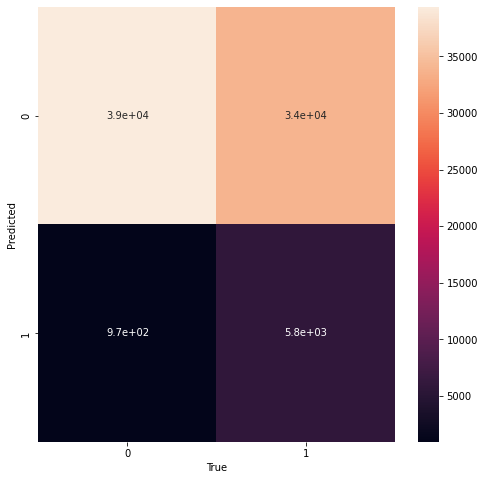

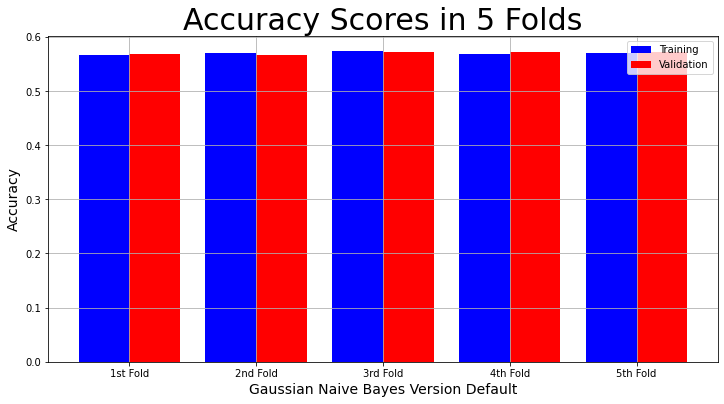

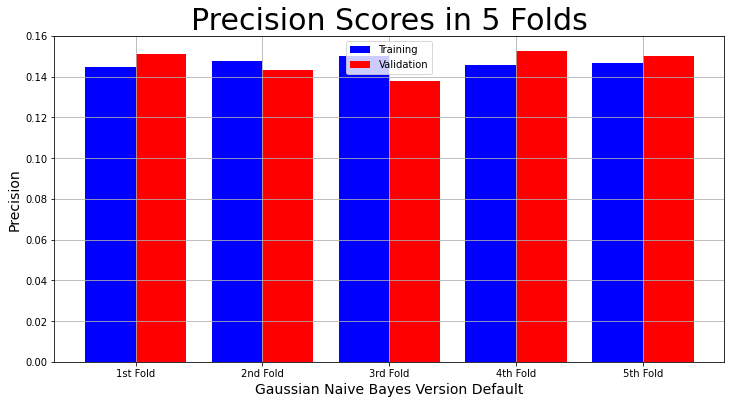

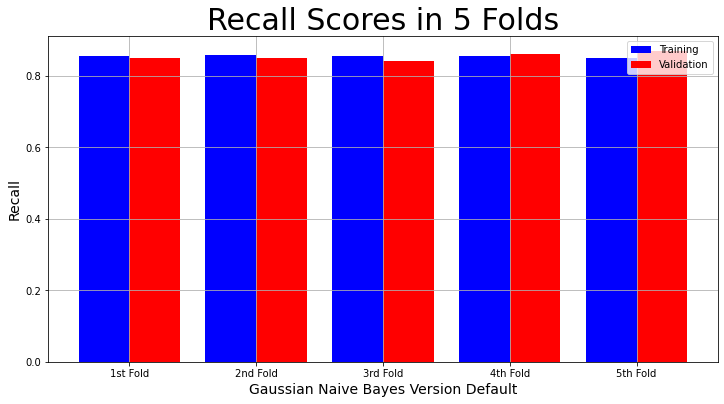

In [ ]:
# Importing relevant libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#Initializing the Default Gaussian Naive Bayes Classifier
classifier = GaussianNB()

# Code for var_smoothing taken from https://holypython.com/nbc/naive-bayes-classifier-optimization-parameters/
GNB = GaussianNB(priors =  [0.9,0.1], var_smoothing=1e-9)

# Initial Training with Model, added print statements to demonstrate that line 14 is being run
print("Training Begins")
GNB.fit(X_train, y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred = GNB.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

print(y_pred)
print("Acc %:",metrics.accuracy_score(y_test, y_pred)*100)

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("Gaussian Naive Bayes Version Default" , cross_results)


**In the following code cell**, we implement variation 2 for the Naive Bayes model. Here we have modified the var_smoothing, variance moothing, which calculates the biggesst variances for each of the features. The default 1e-9 was used above and in this variance we increase the value of variance smoothing. This is to illustrate what impact this increase could have on the efficacy of the model.


Training Begins
Training Done
------------------------------Statistics From Initial Training------------------------------
              precision    recall  f1-score   support

           0       0.98      0.54      0.69     73211
           1       0.15      0.86      0.25      6738

    accuracy                           0.56     79949
   macro avg       0.56      0.70      0.47     79949
weighted avg       0.91      0.56      0.66     79949

[0 1 1 ... 0 0 0]
Acc %: 56.4534890993008

---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.56615957 0.57006833 0.57341422 0.56867681 0.57023139]
Mean Training Accuracy:  56.97100635363448
Training Precision scores:  [0.14473684 0.14784466 0.1501091  0.14562488 0.14640857]
Mean Training Precision:  0.1469448120305039
Training Recall scores:  [0.85518921 0.85743343 0.85427319 0.85500468 0.84976787]
Mean Training Recall: 0.8543336768994424
Validation Accuracy scores:  

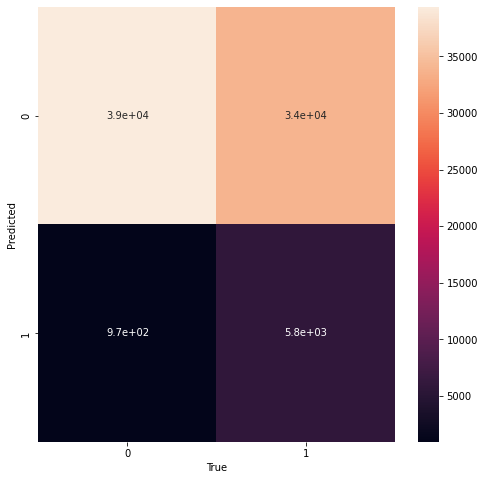

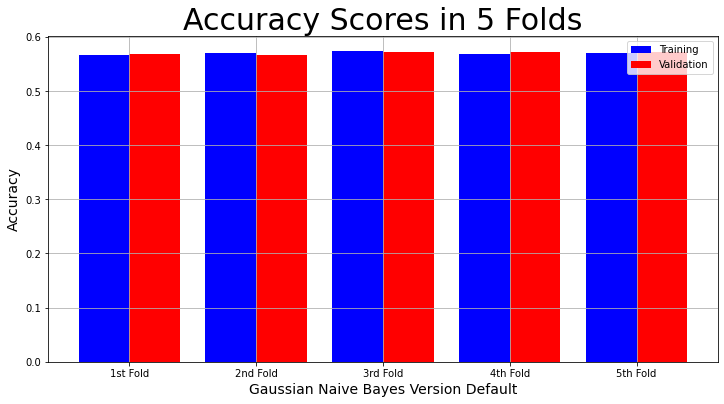

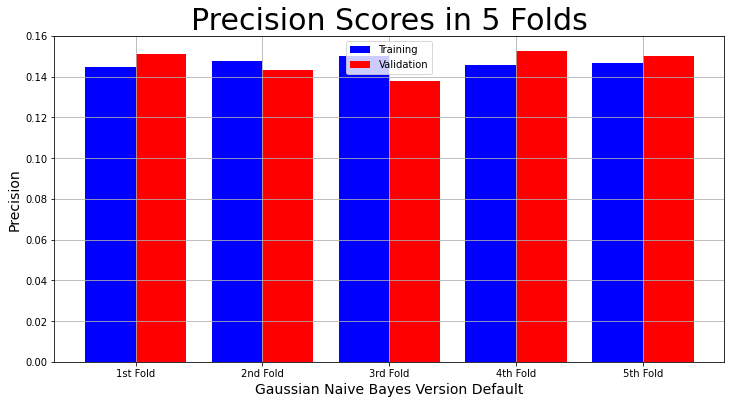

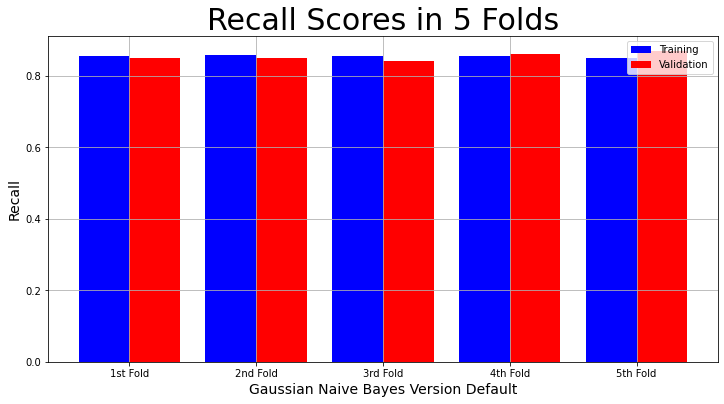

In [ ]:
# Importing relevant libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#for confusion matrix
import matplotlib.pyplot as plt

#Initializing the Default Gaussian Naive Bayes Classifier
classifier = GaussianNB()

# Code for var_smoothing taken from https://holypython.com/nbc/naive-bayes-classifier-optimization-parameters/
GNB = GaussianNB(priors =  [0.9,0.1], var_smoothing=2e-9)

# Initial Training with Model, added print statements to demonstrate that line 14 is being run
print("Training Begins")
GNB.fit(X_train, y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred = GNB.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

print(y_pred)
print("Acc %:",metrics.accuracy_score(y_test, y_pred)*100)

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("Gaussian Naive Bayes Version Default" , cross_results)

**In the following code cell**, we implement variation 3 for the Naive Bayes 
model. Here we have modified the var_smoothing, variance moothing, which calculates the biggesst variances for each of the features. The default 1e-9 was used above and in this variance we retain it, to understand what the effects are for adjusting the priors and not having any variance.

Training Begins
Training Done
------------------------------Statistics From Initial Training------------------------------
              precision    recall  f1-score   support

           0       0.98      0.48      0.64     73211
           1       0.14      0.90      0.24      6738

    accuracy                           0.52     79949
   macro avg       0.56      0.69      0.44     79949
weighted avg       0.91      0.52      0.61     79949


[0 1 1 ... 0 0 1]
Acc %: 51.54661096448986
---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.56615957 0.57006833 0.57341422 0.56867681 0.57023139]
Mean Training Accuracy:  56.97100635363448
Training Precision scores:  [0.14473684 0.14784466 0.1501091  0.14562488 0.14640857]
Mean Training Precision:  0.1469448120305039
Training Recall scores:  [0.85518921 0.85743343 0.85427319 0.85500468 0.84976787]
Mean Training Recall: 0.8543336768994424
Validation Accuracy scores: 

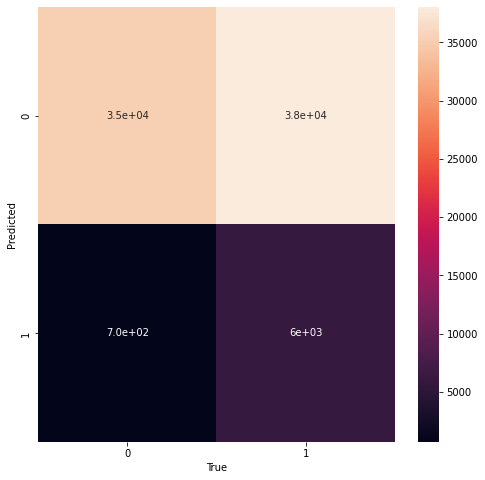

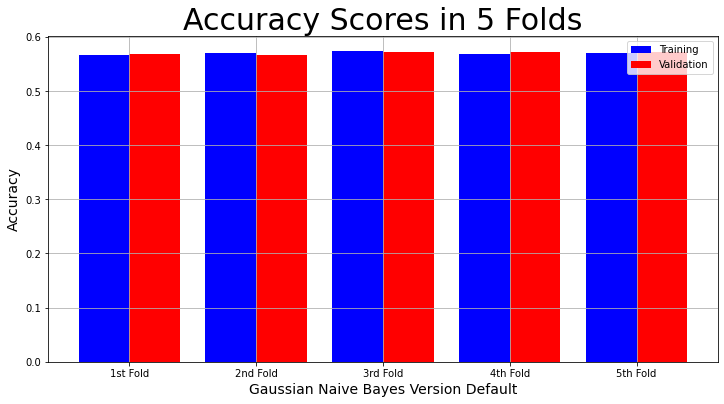

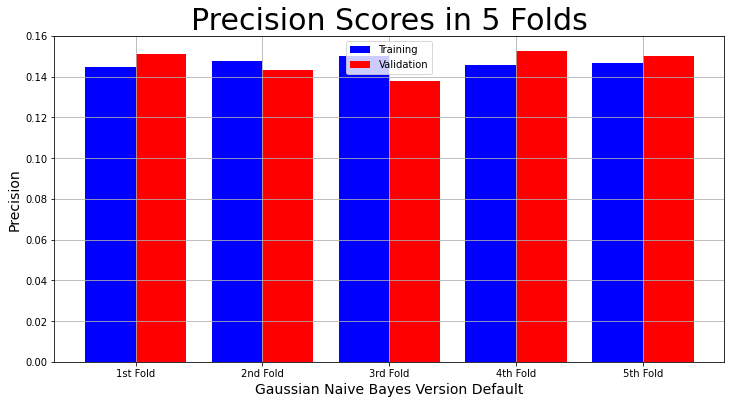

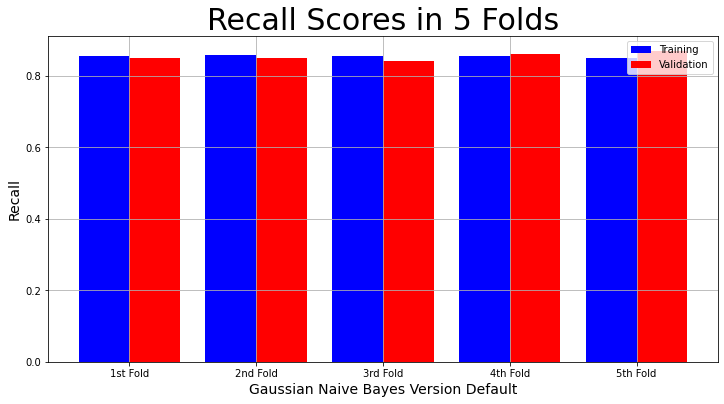

In [ ]:
# Importing relevant libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#Initializing the Default Gaussian Naive Bayes Classifier
classifier = GaussianNB()

# Code for var_smoothing taken from https://holypython.com/nbc/naive-bayes-classifier-optimization-parameters/
GNB = GaussianNB(priors =  [0.5,0.5], var_smoothing=1e-9)

# Initial Training with Model, added print statements to demonstrate that line 14 is being run
print("Training Begins")
GNB.fit(X_train, y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred = GNB.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

print(y_pred)
print("Acc %:",metrics.accuracy_score(y_test, y_pred)*100)

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("Gaussian Naive Bayes Version Default" , cross_results)

*6B: Logistic Regression*
---

**In the following code cell**, we implement the *defualt variation* for the Logistic Regression model as it contains the default settings calibrated by sklearn. There are many more parameters than Naive Bayes Model that can be modified; some examples include *penalty, solver, dual, tol, c, fit_intercept,* and *random_state*.

Reference for this content: https://holypython.com/log-reg/ and tutorials linkedin within this web page such as https://holypython.com/log-reg/logistic-regression-optimization-parameters/.

Training Begins


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Training Done
------------------------------Statistics From Initial Training------------------------------
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73211
           1       0.50      0.05      0.09      6738

    accuracy                           0.92     79949
   macro avg       0.71      0.52      0.52     79949
weighted avg       0.88      0.92      0.88     79949


Acc %: 91.57587962325982
---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.91647774 0.9154771  0.91438265 0.91635266 0.91588493]
Mean Training Accuracy:  91.57150177928732
Training Precision scores:  [0.49565217 0.50184502 0.5        0.49469214 0.50455373]
Mean Training Precision:  0.4993486141597664
Training Recall scores:  [0.04271263 0.05029586 0.04583638 0.04359214 0.05143918]
Mean Training Recall: 0.0467752372923892
Validation Accuracy scores:  [0.91269543 0.9

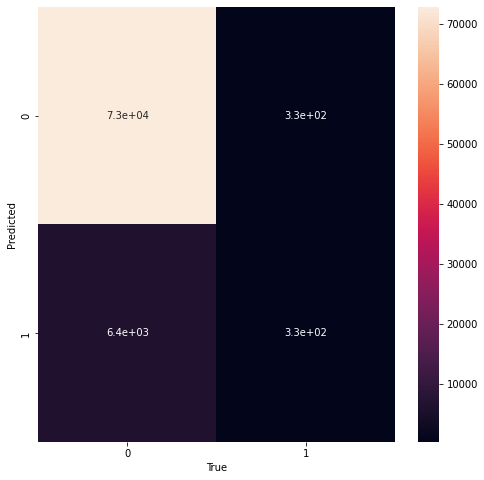

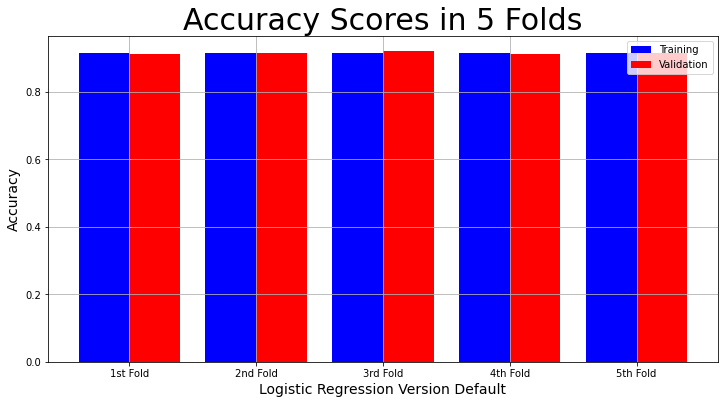

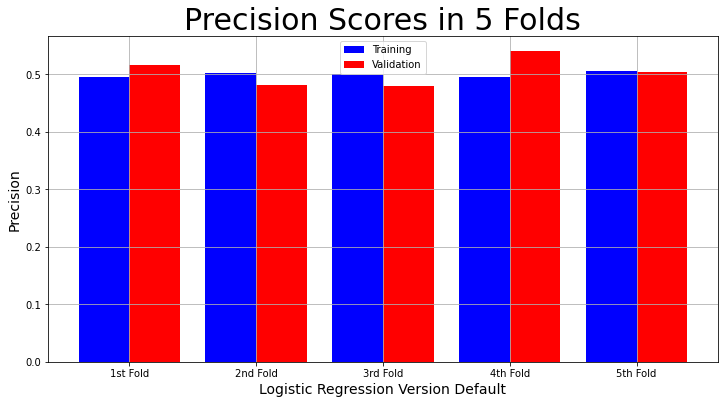

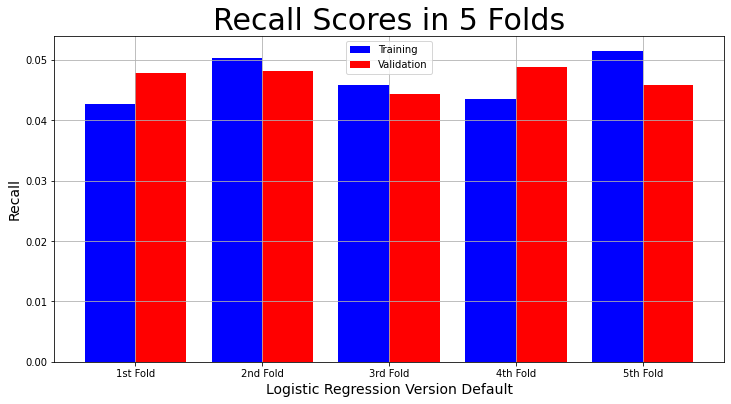

In [ ]:
# Importing relevant libraries
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#Initializing the Default Logistic Regression Classifier
classifier = LogReg()

# Looked at https://holypython.com/log-reg/logistic-regression-simple-implementation/ for code
LogReg = LogReg(verbose = 2, fit_intercept = True, )

# Initial Training with Model, added print statements to demonstrate that line 14 is being run
print("Training Begins")
LogReg.fit(X_train,y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred=LogReg.predict(X_test)
print(y_pred)

print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

print("Acc %:",metrics.accuracy_score(y_test, y_pred)*100)

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("Logistic Regression Version Default" , cross_results)

**In the following code cell**, we implement *variation 2* for the Logistic Regression model as it contains the default settings calibrated by sklearn. There are 7 parameteres that can be modified. 

Training Begins


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Training Done
------------------------------Statistics From Initial Training------------------------------
[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     73211
           1       0.17      0.85      0.28      6738

    accuracy                           0.63     79949
   macro avg       0.57      0.73      0.52     79949
weighted avg       0.91      0.63      0.72     79949


Acc %: 63.475465609325944
---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.91647774 0.9154771  0.91438265 0.91635266 0.91588493]
Mean Training Accuracy:  91.57150177928732
Training Precision scores:  [0.49565217 0.50184502 0.5        0.49469214 0.50455373]
Mean Training Precision:  0.4993486141597664
Training Recall scores:  [0.04271263 0.05029586 0.04583638 0.04359214 0.05143918]
Mean Training Recall: 0.0467752372923892
Validation Accuracy scores:  [0.91269543 0.

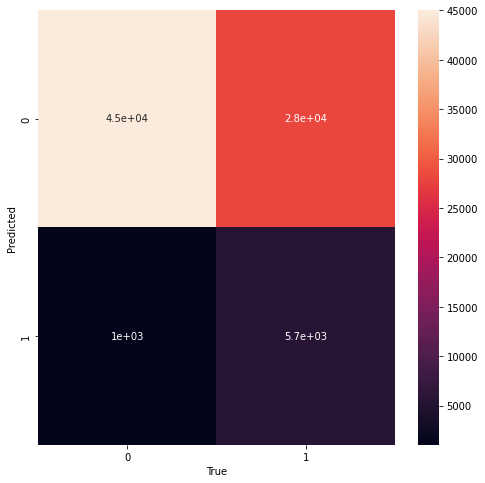

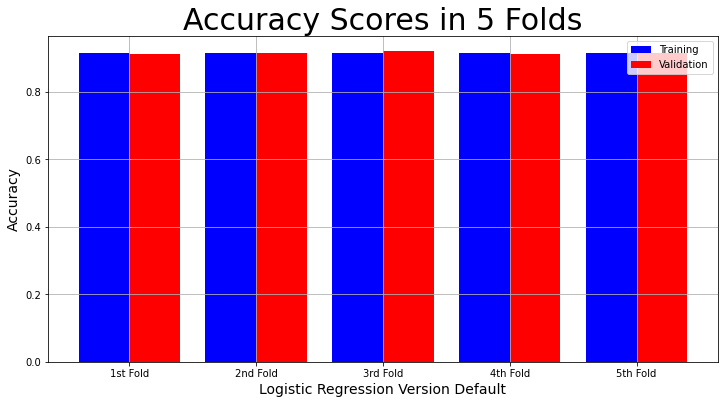

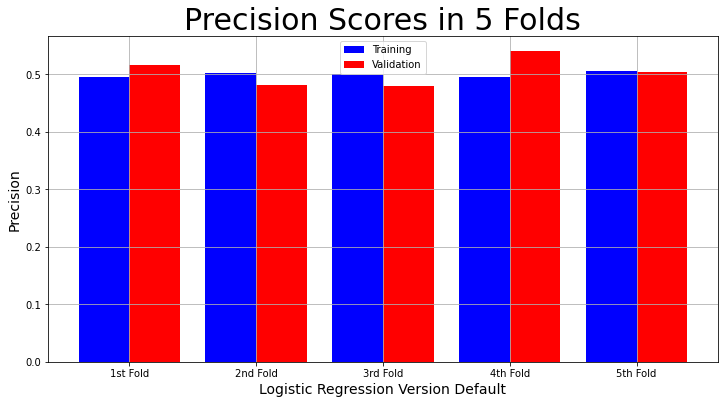

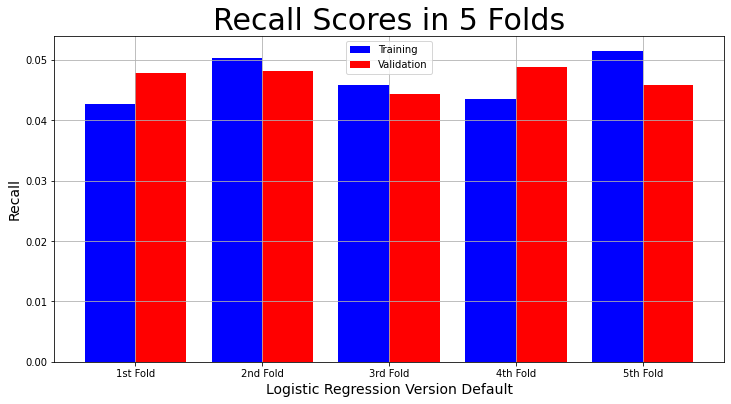

In [ ]:
# Importing relevant libraries
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#Initializing the Default Logistic Regression Classifier
classifier = LogReg()

# Looked at https://holypython.com/log-reg/logistic-regression-simple-implementation/ for code
LogReg = LogReg(verbose = 1, fit_intercept = False, )

# Initial Training with Model, added print statements to demonstrate that line 14 is being run
print("Training Begins")
LogReg.fit(X_train,y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred=LogReg.predict(X_test)
print(y_pred)

print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

print("Acc %:",metrics.accuracy_score(y_test, y_pred)*100)

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("Logistic Regression Version Default" , cross_results)

In the following code cell, we implement *variation 3* for the Logistic Regression model as it contains the default settings calibrated by sklearn. There are 7 parameteres that can be modified.

Training Begins


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


Training Done
------------------------------Statistics From Initial Training------------------------------
[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     73211
           1       0.17      0.85      0.28      6738

    accuracy                           0.63     79949
   macro avg       0.57      0.73      0.52     79949
weighted avg       0.91      0.63      0.72     79949


Acc %: 63.475465609325944
---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.91647774 0.9154771  0.91438265 0.91635266 0.91588493]
Mean Training Accuracy:  91.57150177928732
Training Precision scores:  [0.49565217 0.50184502 0.5        0.49469214 0.50455373]
Mean Training Precision:  0.4993486141597664
Training Recall scores:  [0.04271263 0.05029586 0.04583638 0.04359214 0.05143918]
Mean Training Recall: 0.0467752372923892
Validation Accuracy scores:  [0.91269543 0.

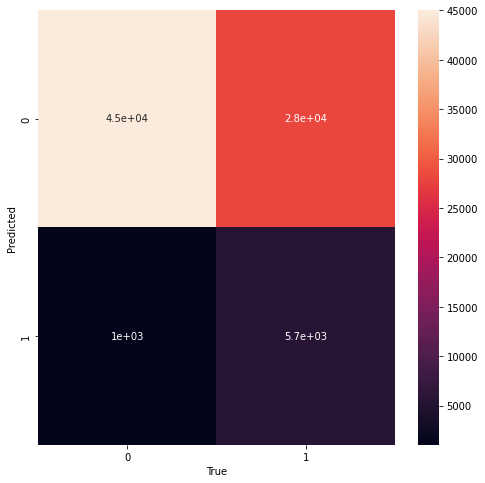

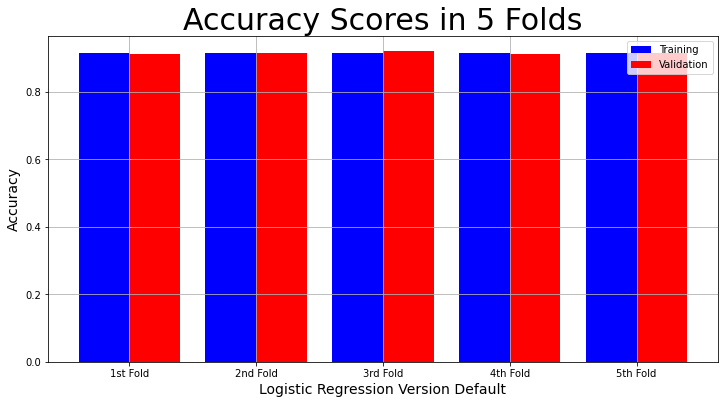

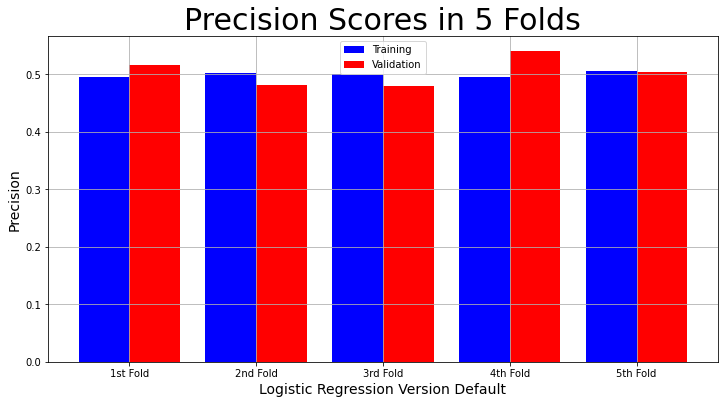

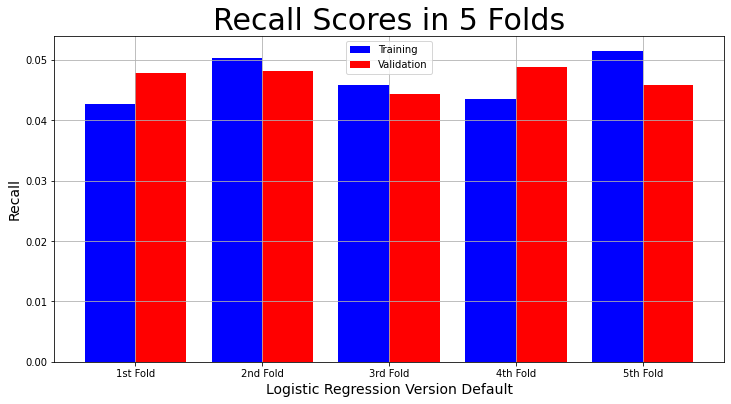

In [ ]:
# Importing relevant libraries
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

#Initializing the Default Logistic Regression Classifier
classifier = LogReg()

# Looked at https://holypython.com/log-reg/logistic-regression-simple-implementation/ for code
LogReg = LogReg(verbose = 1, fit_intercept = False, warm_start = True )

# Initial Training with Model, added print statements to demonstrate that line 14 is being run
print("Training Begins")
LogReg.fit(X_train,y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred=LogReg.predict(X_test)
print(y_pred)

print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(8,8))
seaborn.heatmap(cm, annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')


print("Acc %:",metrics.accuracy_score(y_test, y_pred)*100)

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("Logistic Regression Version Default" , cross_results)

*6C: Multi Layer Perceptron*
---

**Multi-Layer Perceptron**
## Steps
---
**In the following code cells**, we create three variation of a Multi Layer Perception Classifier System with different variation to . For each one we will create the MLP Classifier then proceed to train the data three times, before outputting the results including Accuracy, Precision, and Recall Scores along with the Confusion Matrix and Loss Curve. We also showcase sample predictions vs the training data and the test data to further increase understanding

*   MLP Classifier - Maintains all default settings from sklearn
*   MLP Classifier Variation 1 - Made changes to hidden layer sizes specifying three hidden layers with a small number of nodes. Specified the maximumum number of iterations and set the learning rate to be adaptive. Warm start is also set to true, 
*   MLP Classifier Variation 2 - Made changes to the hidden layer sizes grealty increasing the number of nodes in each layer. Specified the max iteration and utilized the solver sgd. We also hardcoded the learning rate and implemented early stopping. 



**The following code cell contains**, The training and scores for the Multi-Layer Perceptron variation containing the default parameters

Training Begins
Training Done
------------------------------Statistics From Initial Training------------------------------
Accuracy %: 91.57462882587649
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73211
           1       0.50      0.02      0.04      6738

    accuracy                           0.92     79949
   macro avg       0.71      0.51      0.50     79949
weighted avg       0.88      0.92      0.88     79949




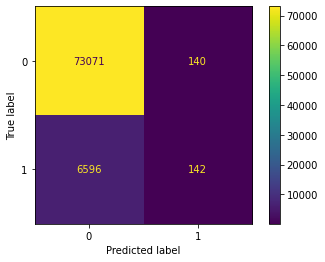

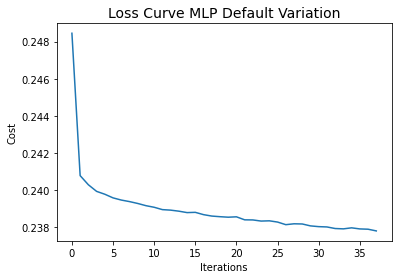


-------------------------SAMPLE PREDICTIONS FROM CLASSIFIER-------------------------
--------Training Predictions--------
Predictions from Classfier For First Ten Values of Training Set:  [0 0 0 0 0 0 0 0 0 0]
Actual Values For First Ten Values of Training Set As Comparison:    [0 0 0 0 0 0 0 1 0 0]

--------Test Predictions--------
Predictions from Classfier For First Ten Values of Test Set:  [0 0 0 0 0 0 0 0 0 0]
Actual Values For First Ten Values of Test Set As Comparison:    [0 1 0 0 1 1 0 0 0 0]
---------------------------------------------------------------------------------------

---------------------------------------CROSS VALIDATION------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Training Accuracy scores:  [0.91963602 0.91865101 0.91771291 0.91962038 0.91952783]
Mean Training Accuracy:  91.90296298321428
Training Precision scores:  [0.61785714 0.66091052 0.64853556 0.65644172 0.72284644]
Mean Training Precision:  0.6613182771006102
Training Recall scores:  [0.09722743 0.07784763 0.084916   0.08007484 0.07168059]
Mean Training Recall: 0.08234929735107473
Validation Accuracy scores:  [0.91094434 0.91419637 0.91926204 0.91056911 0.91356558]
Mean Validation Accuracy:  91.37074867489223
Validation Precision scores:  [0.43814433 0.37037037 0.40397351 0.3836478  0.3875969 ]
Mean Validation Precision:  0.3967465816335994
Validation Recall scores:  [0.06071429 0.04511278 0.04833597 0.04379038 0.03695492]
Mean Validation Recall:  0.04698166755801783



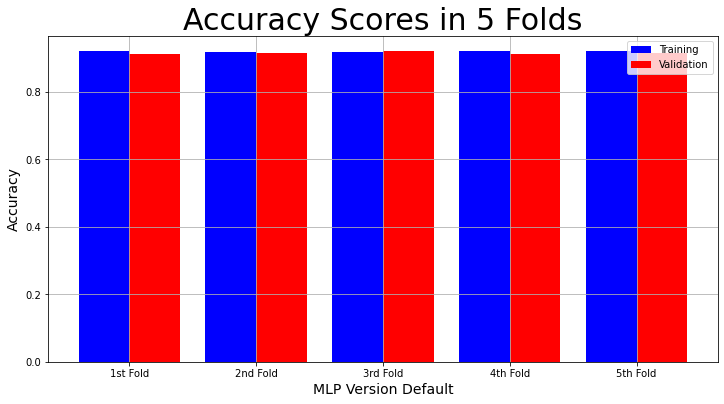

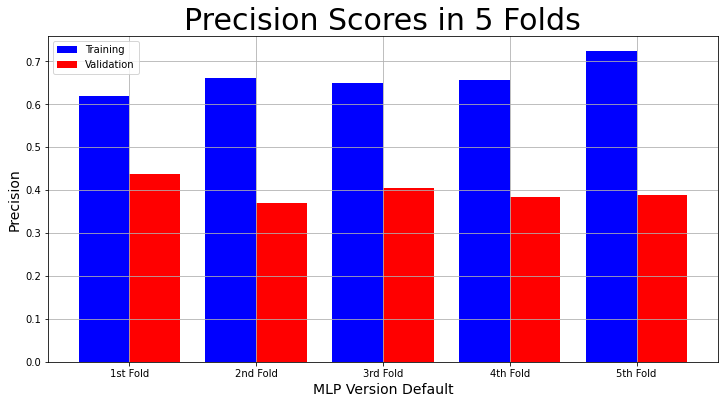

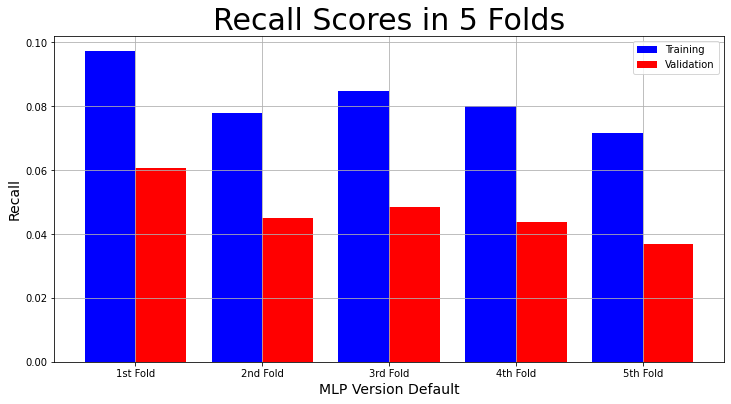

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_validate

#Initializing the Default MLPClassifier
classifier = MLPClassifier()

#Initial training with model
print("Training Begins")
classifier.fit(X_train, y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred = classifier.predict(X_test)

print("Accuracy %:",metrics.accuracy_score(y_test, y_pred)*100)
print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm_obj = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
cm_obj.plot()
plt.show()

#Loss Curve
print()
plt.plot(classifier.loss_curve_)
plt.title("Loss Curve MLP Default Variation", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#Show test values
sampleData(y_train,y_test, y_pred)
print()

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier,X_test, y_test)
print()
plot_cross_val("MLP Version Default" , cross_results)


**The following code cell contains**, The training and scores for the Multi-Layer Perceptron variation containing with the parameters adjusted (First Variation)

Training Begins
Training Done
------------------------------Statistics From Initial Training------------------------------
Accuracy %: 91.61340354475979
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73211
           1       0.56      0.02      0.04      6738

    accuracy                           0.92     79949
   macro avg       0.74      0.51      0.50     79949
weighted avg       0.89      0.92      0.88     79949




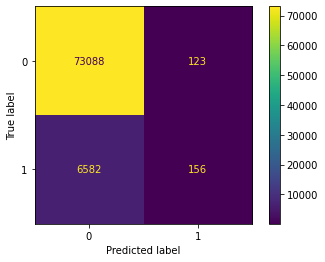

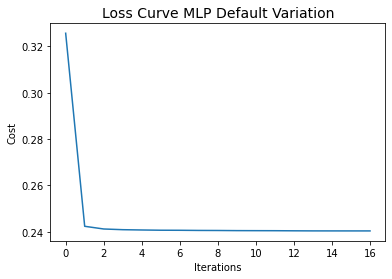


-------------------------SAMPLE PREDICTIONS FROM CLASSIFIER-------------------------
--------Training Predictions--------
Predictions from Classfier For First Ten Values of Training Set:  [0 0 0 0 0 0 0 0 0 0]
Actual Values For First Ten Values of Training Set As Comparison:    [0 0 0 0 0 0 0 1 0 0]

--------Test Predictions--------
Predictions from Classfier For First Ten Values of Test Set:  [0 0 0 0 0 0 0 0 0 0]
Actual Values For First Ten Values of Test Set As Comparison:    [0 1 0 0 1 1 0 0 0 0]
---------------------------------------------------------------------------------------

---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.91691552 0.91624322 0.91500805 0.91694679 0.91629143]
Mean Training Accuracy:  91.62810041075309
Training Precision scores:  [0.54081633 0.56763926 0.57462687 0.56521739 0.53249476]
Mean Training Precision:  0.5561589199421769
Training Recall scores:  [0.02978644 0.03957101 0

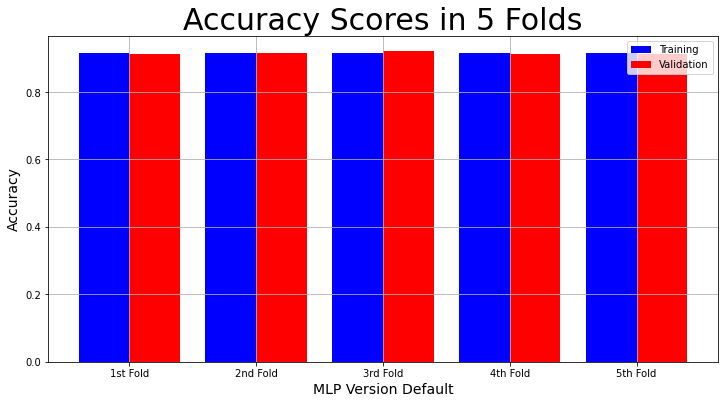

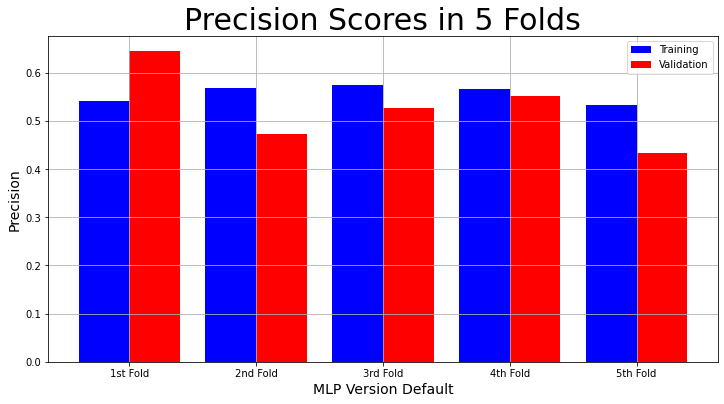

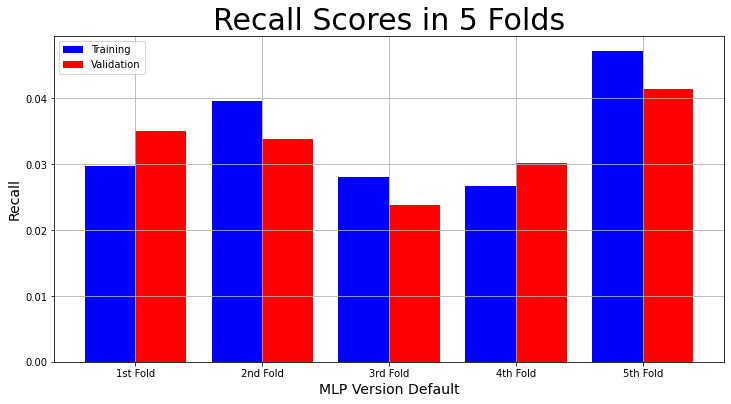

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

#Initializing the MLPClassifier with variations
classifier_var1 = MLPClassifier(hidden_layer_sizes=(5,3,2), max_iter=100,solver='adam',random_state=1, learning_rate='adaptive', warm_start=True)

#Initial training with model
print("Training Begins")
classifier_var1.fit(X_train, y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred = classifier_var1.predict(X_test)

print("Accuracy %:",metrics.accuracy_score(y_test, y_pred)*100)
print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm_obj = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
cm_obj.plot()
plt.show()

#Loss Curve
print()
plt.plot(classifier_var1.loss_curve_)
plt.title("Loss Curve MLP Default Variation", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#Show test values
sampleData(y_train,y_test, y_pred)
print()

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier_var1,X_test, y_test)
print()
plot_cross_val("MLP Version Default" , cross_results)

**The following code cell contains**, The training and scores for the Multi-Layer Perceptron variation containing with the parameters adjusted (Second Variation)

Training Begins
Training Done
------------------------------Statistics From Initial Training------------------------------
Accuracy %: 91.59339078662647
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73211
           1       0.55      0.02      0.03      6738

    accuracy                           0.92     79949
   macro avg       0.73      0.51      0.49     79949
weighted avg       0.89      0.92      0.88     79949




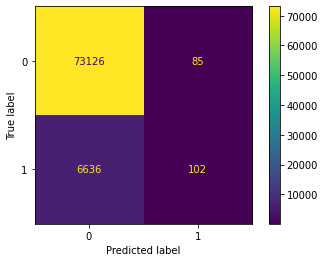

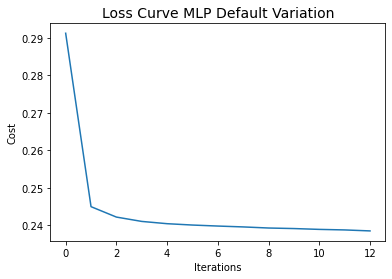


-------------------------SAMPLE PREDICTIONS FROM CLASSIFIER-------------------------
--------Training Predictions--------
Predictions from Classfier For First Ten Values of Training Set:  [0 0 0 0 0 0 0 0 0 0]
Actual Values For First Ten Values of Training Set As Comparison:    [0 0 0 0 0 0 0 1 0 0]

--------Test Predictions--------
Predictions from Classfier For First Ten Values of Test Set:  [0 0 0 0 0 0 0 0 0 0]
Actual Values For First Ten Values of Test Set As Comparison:    [0 1 0 0 1 1 0 0 0 0]
---------------------------------------------------------------------------------------

---------------------------------------CROSS VALIDATION------------------------------------------
Training Accuracy scores:  [0.91768164 0.91622758 0.91496115 0.91691552 0.91605691]
Mean Training Accuracy:  91.63685609315012
Training Precision scores:  [0.59838275 0.58064516 0.55124654 0.53421634 0.52531646]
Mean Training Precision:  0.5579614478499263
Training Recall scores:  [0.04158861 0.03328402 0

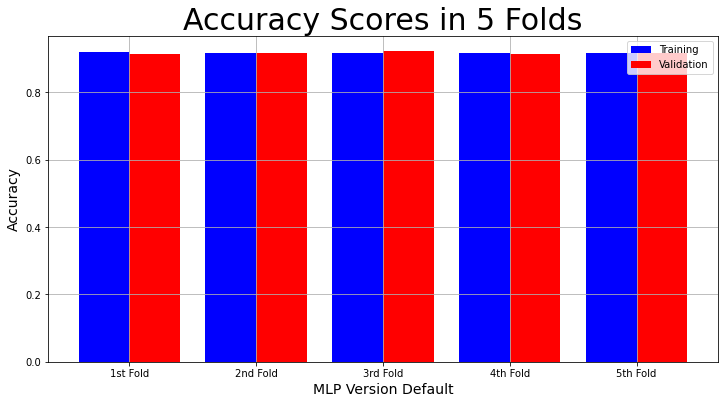

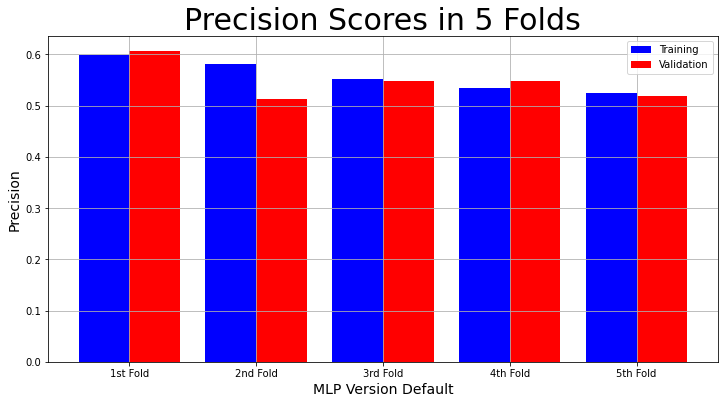

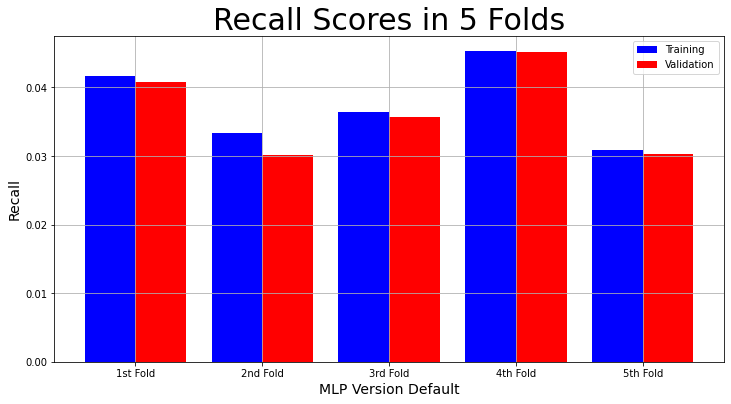

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

#Initializing the MLPClassifier with variations again
classifier_var2 = MLPClassifier(hidden_layer_sizes=(150, 75, 30, 15, 9, 3), max_iter=250,  solver='sgd', random_state=1, learning_rate_init=0.01, early_stopping=True)

#Initial training with model
print("Training Begins")
classifier_var2.fit(X_train, y_train)
print("Training Done")

print("------------------------------Statistics From Initial Training------------------------------")
y_pred = classifier_var2.predict(X_test)

print("Accuracy %:",metrics.accuracy_score(y_test, y_pred)*100)
print(metrics.classification_report(y_test, y_pred))

#Plot the confusion matrix
print()
cm = confusion_matrix(y_test, y_pred)
cm_obj = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
cm_obj.plot()
plt.show()

#Loss Curve
print()
plt.plot(classifier_var2.loss_curve_)
plt.title("Loss Curve MLP Default Variation", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#Show test values
sampleData(y_train,y_test, y_pred)
print()

#Test With Cross Validation
print("---------------------------------------CROSS VALIDATION------------------------------------------")
cross_results = cross_val_stats(classifier_var2,X_test, y_test)
print()
plot_cross_val("MLP Version Default" , cross_results)


# **10. Analyze the obtained results**

---

In conclusion,  our project meets all the requirements outlined in the instructions. Our dataset being imbalanced posed opportunities for learning in terms of how this can affect the accuracy of models and the viability of being able to reach our prediction goal.


# Gaussian Naive Bayes Results

# Variation Default

The default variation maintained all the default parameter of the Gaussian Naive Bayes function defined in sklearn, as specified in the text cell ahead of the code.

From the results, we can observe that the accuracy is ~56%, which is quite low, especially noting the imbalanced class. Further, through cross validation, we can observe that it remains similar. We can also note that in the precision, recall, and accuracy scores, the default and training scores are almost identical which is a positive sign.

# Variation Two

There is no improvement in accuracy from the first variation, we remain at ~56%.

# Variation Three

There is no improvement in accuracy from the first variation, we remain at ~56%.

To avoid duplication of content, ensuring brevity, the details of each change is not re-specified within this section. I draw your attention to whether this model was succesful in comparison to logistic regression and MLP - it was not. It aligned with theoretical knowledge given the heavy imbalances of our data.


# Logistic Regression Results

# Variation Default

The default variation maintained all the default parameter of the Logistic Regression function defined in sklearn, as specified in the text cell ahead of the code.

From the results, we can observe that the accuracy is ~91.57%, which is quite high and a significant improvement from the Gaussian Naive Bayes, especially noting the imbalanced class. Further, through cross validation, we can observe that it remains similar. We can also note that in the precision, recall, and accuracy scores, the default and training scores are almost identical which is a positive sign. The recall scores are not as identical.

# Variation Two

In this variation, the accuracy declined to ~63%, that's an ~20% drop. This is attributed to changing the interrcept to be false, so we're not accounting for any bias through this constant.

# Variation Three

In this variation, the accuracy is ~63%, we keep the intercept as false and introduce a warm_start which I believe will reinstantiate weights before each new fit - this did not increase accuracy.

To avoid duplication of content, ensuring brevity, the details of each change is not re-specified within this section. This model is succesful when there is a fit_intercept, because there is a constant bias acounted for - telling for a heavily unbalanced dataset.

*Multi Layer Perceptron Results*
---



# Variation Default
The default variation maintained all the default parameter of the Multi Layer Perceptron Classifier function defined in sklearn. These default values included

We gathered the initial statistics after training the model once on the input data as a whole. We can see that the initial statistics are influenced by the bias in the dataset showcasing an extremely high recall and precision for 0 (FALSE to having Heart Disease) and low values for precision and recall for 1 (TRUE to having Heart Disease). Overall, the accuracy of the predictor model against the test data is 92%, which is quite high. We also displayed the loss curve which reached a low of 0.238 cost before balancing out after 35 iterations. We also showcased the sample predictions from the model vs the training and test set data. In this variation the prediction was 90% accurate against the training set and 70% accurate against the test set based on the first 10 values of each set. 

Afterwards we conducted and trained the model according to 5-fold cross validation and displayed the results and statistics in graph format. From the results we can see the model maintained an average of 91.5% accuracy rate for all the folds, a 0.44 precision score, and a 0.06 recall score. From the graphs we can see that the model follows more closely to the training data rather than the test data, in terms of the precision and recall, despite the high accuracy. 

# Variation One
In this variation we added some modifications to the parameters of the function including changing the hidden layer sizes, the maximum number of iterations, the learning rate, and warm start condition.
After gathering the initial statistics, we can see that the same influences from bias in the dataset have affected the model. Overall, the accuracy of this model is 92% and the loss curve stabilized at 0.24 cost at 16 iterations. For the sample prediction, in this variation we see the prediction was 90% accurate against the training set and 70% accurate against the test set based on the first 10 values of each set.

From the results of training based on 5-Fold cross validation we see the model maintained an average of 91.6% accuracy rate for all the folds, a 0.53 precision score, and a 0.03 recall score. From the graphs we can see the accuracy for the remained consistently similar for both the test and training data from the model. Interestingly we see in the first fold the precision of the test data was much higher than the training, before training becoming higher for the next folds. Recall scores alternated each round for which one was higher.
 
# Variation Three
In the third variation we added some modifications to the parameters of the function including changing the hidden layer sizes, the maximum number of iterations, changed the solver, hardcoded the learning rate, and implemented early stopping. 

After gathering the initial statistics, we can see that the same influences from bias in the dataset have affected the model. Overall, the accuracy of this model is 92% and the loss curve stabilized at 0.24 cost at 16 iterations. For the sample prediction, in this variation we see the prediction was 90% accurate against the training set and 70% accurate against the test set based on the first 10 values of each set.

From the results of training based on 5-Fold cross validation we see the model maintained an average of 91.6% accuracy rate for all the folds, a 0.55 precision score, and a 0.04 recall score. From the graphs we can see the accuracy for the remained consistently similar for both the test and training data from the model. Precision scores remained relatively consistent and recall scores varied across each fold, but the train and test data remained similar. 

# Conclusion For Multi Layer Perceptron
After evaluating all the Multilayer Perceptron Models, we can see that the Variation two and three work slightly better despite all of them being very similar. Keeping the bias of the dataset in mind although the model was accurate, however real-world statistics can still differ drastically. As health within the world changes over time with new illnesses but also advancements we may see the numbers in the initial dataset change drastically which in turn would mean modifications to the model are needed. For now, bias can be resolved using over/under sampling but the downside to those is fabricating data and removing sources of data.


#Overall
---
Overall we can see according to the results that the Multi Layer Percreptron produces the best and most consistent results in terms of classifying and predicting which patients have heart disease in the dataset. While modifying the parameters it still performed with the highest accuracy against all of the other models on average.

This aligns with our knowledge from class of how the model would perform theoretically with an unbalanced dataset and the steps we have taken in this project to mitigate/rectify this.

We also note that Gaussian Naive Bayes performed the poorest amongst the three models - interesting because in that model, there is belief that each parameter can independently contribute to predicting output - it is limited by variance and mean as opposed to a model such as MLP.

# **References**

---

The references listed below were used for theory as well as to understand the material better. For portions were code was used, the references were listed within the code cell itself to be more accurate and forthcoming in disclosure.

1.   https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection
2.  https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/
3. https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/
4. https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
5. https://holypython.com/log-reg/logistic-regression-simple-implementation/
6. https://holypython.com/nbc/
7. https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/
8. https://pub.towardsai.net/gaussian-naive-bayes-explained-and-hands-on-with-scikit-learn-4183b8cb0e4c?gi=ad2d413a6870




